In [ ]:
import pandas as pd
import glob

csv_files = glob.glob("results/metrics_noise_*.csv") + ["results/metrics_clean.csv"]

df_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

df_all["noise_level"] = df_all["noise_level"].replace({"clean": "0"})
df_all["noise_level"] = df_all["noise_level"].str.extract("(\d+)").astype(int)

df_all.head()


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
/var/folders/hn/60hc6_cx67vdp1_qvwt7xrqw0000gn/T/ipykernel_22679/726677000.py:12: SyntaxWarning: invalid escape sequence '\d'
  df_all["noise_level"] = df_all["noise_level"].str.extract("(\d+)").astype(int)


,accuracy,f1_phishing,precision,recall,noise_level,run
0,0.935,0.9427,0.8992,0.9907,15,1
1,0.930,0.9320,0.9796,0.8889,15,2
2,0.975,0.9767,0.9813,0.9722,15,3
3,0.970,0.9722,0.9722,0.9722,10,1
4,0.905,0.9163,0.8739,0.9630,10,2


In [ ]:

summary = df_all.groupby("noise_level").agg(["mean", "std"])


summary.columns = ['_'.join(col).strip() for col in summary.columns.values]


summary.reset_index(inplace=True)
summary


,noise_level,accuracy_mean,accuracy_std,f1_phishing_mean,f1_phishing_std,precision_mean,precision_std,recall_mean,recall_std,run_mean,run_std
0,0,0.985000,0.000000,0.986200,0.000000,0.981700,0.000000,0.990700,0.000000,2.0,1.0
1,5,0.966667,0.005774,0.968900,0.005112,0.978167,0.013934,0.959900,0.005369,2.0,1.0
2,10,0.943333,0.034034,0.949000,0.029136,0.933400,0.052317,0.966067,0.005312,2.0,1.0
3,15,0.946667,0.024664,0.950467,0.023340,0.953367,0.046917,0.950600,0.054228,2.0,1.0
4,20,0.955000,0.034641,0.959833,0.029474,0.943267,0.058421,0.978400,0.005369,2.0,1.0
5,25,0.928333,0.028431,0.935700,0.025174,0.910533,0.038436,0.962967,0.024492,2.0,1.0
6,30,0.901667,0.031754,0.905933,0.039723,0.921400,0.050606,0.901200,0.117230,2.0,1.0
7,35,0.960000,0.013229,0.963667,0.011368,0.950233,0.033169,0.978400,0.019263,2.0,1.0
8,40,0.921667,0.007638,0.931367,0.006910,0.883667,0.007027,0.984567,0.014151,2.0,1.0
9,45,0.923333,0.010408,0.930867,0.007656,0.910467,0.036841,0.953700,0.027800,2.0,1.0


In [ ]:
import pandas as pd
import os

# noise levels
noise_levels = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
all_dfs = []

for level in noise_levels:
    if level == 0:
        path = "results/metrics_clean.csv"
    else:
        path = f"results/metrics_noise_{level}.csv"
    
    if os.path.exists(path):
        df = pd.read_csv(path)
        df["noise_level_num"] = int(level)
        all_dfs.append(df)
    else:
        print(f"Missing file: {path}")

#save
all_df = pd.concat(all_dfs, ignore_index=True)
all_df.to_csv("results/metrics_all_noise.csv", index=False)


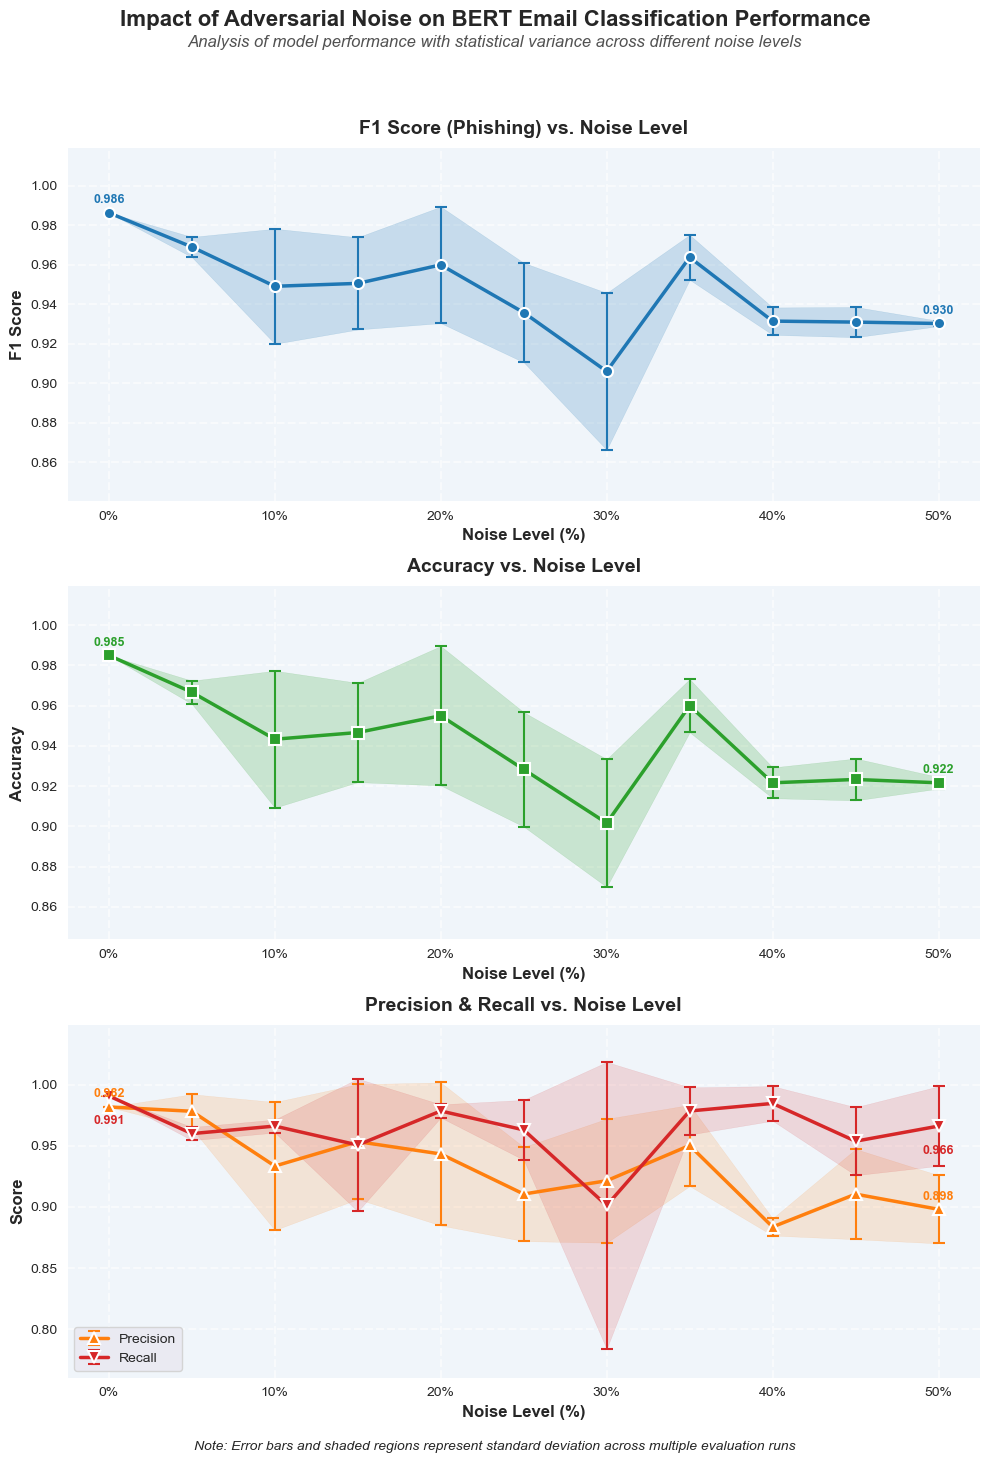

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, PercentFormatter

plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.dpi'] = 100

# reading csv 
df = pd.read_csv("results/metrics_all_noise.csv")


summary = df.groupby("noise_level_num").agg({
    "f1_phishing": ["mean", "std"],
    "accuracy": ["mean", "std"],
    "precision": ["mean", "std"],
    "recall": ["mean", "std"],
}).reset_index()

# column names
summary.columns = ["noise_level", "f1_mean", "f1_std", "acc_mean", "acc_std", "prec_mean", "prec_std", "recall_mean", "recall_std"]


colors = {
    'f1': '#1f77b4',      
    'accuracy': '#2ca02c', 
    'precision': '#ff7f0e', 
    'recall': '#d62728'   
}


bg_color = '#F0F5FA'  


fig, axs = plt.subplots(3, 1, figsize=(10, 15), dpi=100)
fig.subplots_adjust(hspace=0.3)

#formatting 
def style_subplot(ax, title, ylabel, ylim=None):
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlabel("Noise Level (%)", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    if ylim:
        ax.set_ylim(ylim)
    

    ax.set_facecolor(bg_color)
    

    ax.grid(True, linestyle='--', alpha=0.6, color='white', linewidth=1.5)
    ax.set_axisbelow(True)
    

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    

    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    

    ax.xaxis.set_major_formatter(PercentFormatter())


axs[0].errorbar(
    summary["noise_level"], summary["f1_mean"], yerr=summary["f1_std"],
    marker="o", color=colors['f1'], linewidth=2.5, capsize=4,
    markersize=8, markeredgecolor='white', markeredgewidth=1.5,
    elinewidth=1.5, capthick=1.5
)
axs[0].fill_between(
    summary["noise_level"], 
    summary["f1_mean"] - summary["f1_std"], 
    summary["f1_mean"] + summary["f1_std"], 
    alpha=0.2, color=colors['f1']
)

f1_min = (summary["f1_mean"] - summary["f1_std"]).min() * 0.97
f1_max = (summary["f1_mean"] + summary["f1_std"]).max() * 1.03
style_subplot(axs[0], "F1 Score (Phishing) vs. Noise Level", "F1 Score", ylim=(max(0.5, f1_min), min(1.05, f1_max)))


for i, (x, y) in enumerate(zip(summary["noise_level"], summary["f1_mean"])):
    if i == 0 or i == len(summary["noise_level"])-1:
        axs[0].annotate(
            f'{y:.3f}', 
            xy=(x, y), 
            xytext=(0, 7),
            textcoords='offset points',
            ha='center', 
            fontsize=9,
            color=colors['f1'],
            fontweight='bold'
        )


axs[1].errorbar(
    summary["noise_level"], summary["acc_mean"], yerr=summary["acc_std"],
    marker="s", color=colors['accuracy'], linewidth=2.5, capsize=4,
    markersize=8, markeredgecolor='white', markeredgewidth=1.5,
    elinewidth=1.5, capthick=1.5
)
axs[1].fill_between(
    summary["noise_level"], 
    summary["acc_mean"] - summary["acc_std"], 
    summary["acc_mean"] + summary["acc_std"], 
    alpha=0.2, color=colors['accuracy']
)

acc_min = (summary["acc_mean"] - summary["acc_std"]).min() * 0.97
acc_max = (summary["acc_mean"] + summary["acc_std"]).max() * 1.03
style_subplot(axs[1], "Accuracy vs. Noise Level", "Accuracy", ylim=(max(0.5, acc_min), min(1.05, acc_max)))


for i, (x, y) in enumerate(zip(summary["noise_level"], summary["acc_mean"])):
    if i == 0 or i == len(summary["noise_level"])-1:
        axs[1].annotate(
            f'{y:.3f}', 
            xy=(x, y), 
            xytext=(0, 7),
            textcoords='offset points',
            ha='center', 
            fontsize=9,
            color=colors['accuracy'],
            fontweight='bold'
        )


axs[2].errorbar(
    summary["noise_level"], summary["prec_mean"], yerr=summary["prec_std"],
    marker="^", label="Precision", linewidth=2.5, color=colors['precision'], capsize=4,
    markersize=8, markeredgecolor='white', markeredgewidth=1.5,
    elinewidth=1.5, capthick=1.5
)
axs[2].fill_between(
    summary["noise_level"], 
    summary["prec_mean"] - summary["prec_std"], 
    summary["prec_mean"] + summary["prec_std"], 
    alpha=0.15, color=colors['precision']
)

axs[2].errorbar(
    summary["noise_level"], summary["recall_mean"], yerr=summary["recall_std"],
    marker="v", label="Recall", linewidth=2.5, color=colors['recall'], capsize=4,
    markersize=8, markeredgecolor='white', markeredgewidth=1.5,
    elinewidth=1.5, capthick=1.5
)
axs[2].fill_between(
    summary["noise_level"], 
    summary["recall_mean"] - summary["recall_std"], 
    summary["recall_mean"] + summary["recall_std"], 
    alpha=0.15, color=colors['recall']
)


pr_min = min((summary["prec_mean"] - summary["prec_std"]).min(), 
             (summary["recall_mean"] - summary["recall_std"]).min()) * 0.97
pr_max = max((summary["prec_mean"] + summary["prec_std"]).max(), 
             (summary["recall_mean"] + summary["recall_std"]).max()) * 1.03
style_subplot(axs[2], "Precision & Recall vs. Noise Level", "Score", ylim=(max(0.5, pr_min), min(1.05, pr_max)))


for i, (x, y_prec, y_rec) in enumerate(zip(summary["noise_level"], summary["prec_mean"], summary["recall_mean"])):
    if i == 0 or i == len(summary["noise_level"])-1:
        # Precision label
        axs[2].annotate(
            f'{y_prec:.3f}', 
            xy=(x, y_prec), 
            xytext=(0, 7),
            textcoords='offset points',
            ha='center', 
            fontsize=9,
            color=colors['precision'],
            fontweight='bold'
        )
        

        axs[2].annotate(
            f'{y_rec:.3f}', 
            xy=(x, y_rec), 
            xytext=(0, -20),
            textcoords='offset points',
            ha='center', 
            fontsize=9,
            color=colors['recall'],
            fontweight='bold'
        )


legend = axs[2].legend(
    loc='lower left', 
    frameon=True, 
    framealpha=0.95,
    edgecolor='lightgray',
    fontsize=10
)
legend.get_frame().set_linewidth(1)


fig.suptitle("Impact of Adversarial Noise on BERT Email Classification Performance", 
             fontsize=16, fontweight='bold', y=0.98)


fig.text(0.5, 0.955, 
         "Analysis of model performance with statistical variance across different noise levels",
         ha='center', fontsize=12, style='italic', alpha=0.8)


fig.text(0.5, 0.02, 
         "Note: Error bars and shaded regions represent standard deviation across multiple evaluation runs",
         ha='center', fontsize=10, style='italic')


plt.tight_layout(rect=[0, 0.03, 1, 0.94])

# show graph 
plt.show()

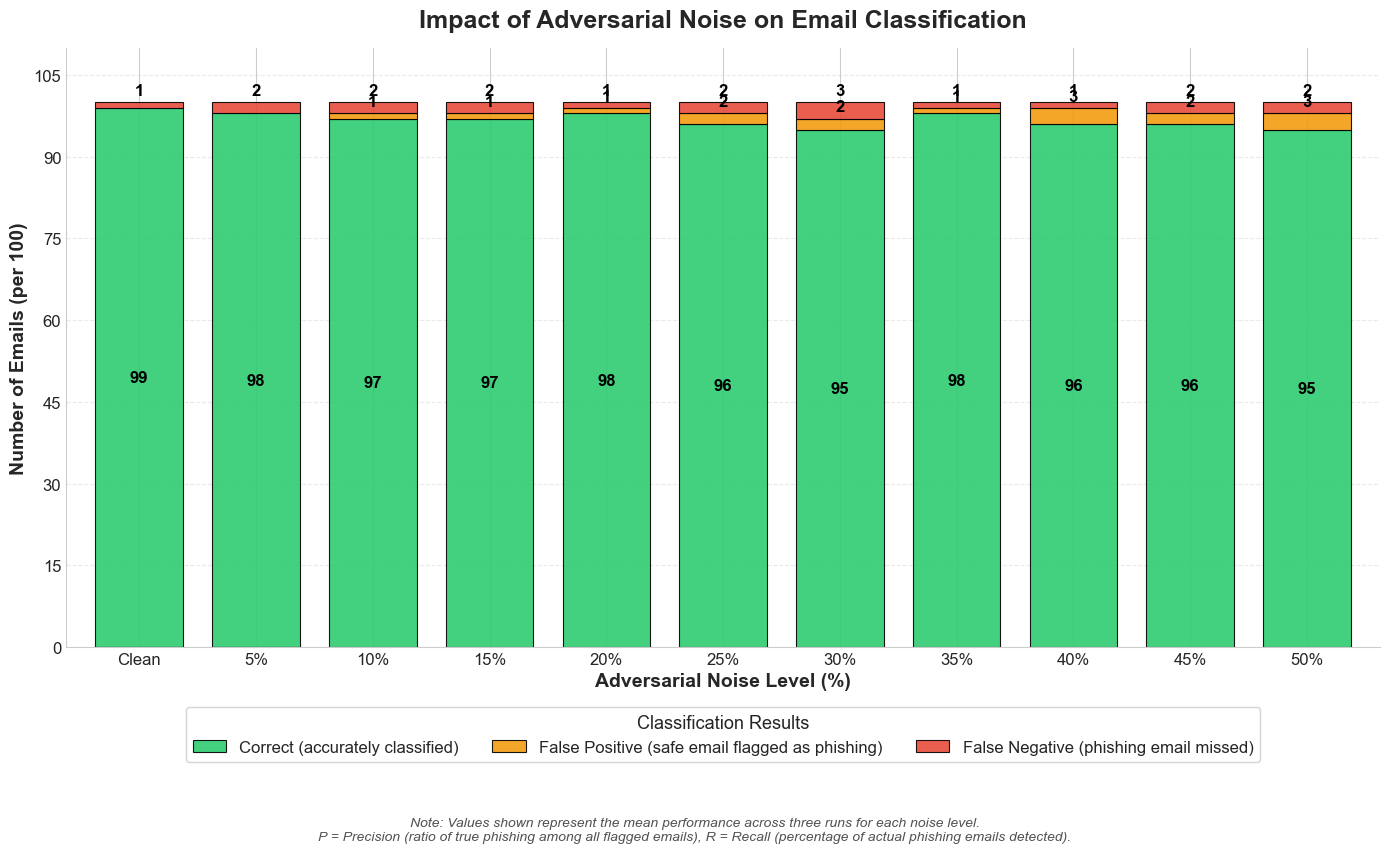

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
from io import StringIO

# getting values from results, csv would not load so I am doing this manually
csv_data = """
accuracy,f1_phishing,precision,recall,noise_level,run,noise_level_num
0.985,0.9862,0.9817,0.9907,clean,1,0
0.985,0.9862,0.9817,0.9907,clean,2,0
0.985,0.9862,0.9817,0.9907,clean,3,0
0.96,0.963,0.963,0.963,noise_5,1,5
0.97,0.9717,0.9904,0.9537,noise_5,2,5
0.97,0.972,0.9811,0.963,noise_5,3,5
0.97,0.9722,0.9722,0.9722,noise_10,1,10
0.905,0.9163,0.8739,0.963,noise_10,2,10
0.955,0.9585,0.9541,0.963,noise_10,3,10
0.935,0.9427,0.8992,0.9907,noise_15,1,15
0.93,0.932,0.9796,0.8889,noise_15,2,15
0.975,0.9767,0.9813,0.9722,noise_15,3,15
0.915,0.9258,0.876,0.9815,noise_20,1,20
0.975,0.977,0.9725,0.9815,noise_20,2,20
0.975,0.9767,0.9813,0.9722,noise_20,3,20
0.92,0.9298,0.8833,0.9815,noise_25,1,25
0.96,0.9633,0.9545,0.9722,noise_25,2,25
0.905,0.914,0.8938,0.9352,noise_25,3,25
0.92,0.9273,0.9107,0.9444,noise_30,1,30
0.92,0.9304,0.877,0.9907,noise_30,2,30
0.865,0.8601,0.9765,0.7685,noise_30,3,30
0.95,0.9558,0.9153,1.0,noise_35,1,35
0.955,0.9585,0.9541,0.963,noise_35,2,35
0.975,0.9767,0.9813,0.9722,noise_35,3,35
0.93,0.9391,0.8852,1.0,noise_40,1,40
0.915,0.9258,0.876,0.9815,noise_40,2,40
0.92,0.9292,0.8898,0.9722,noise_40,3,40
0.92,0.9298,0.8833,0.9815,noise_45,1,45
0.915,0.9238,0.8957,0.9537,noise_45,2,45
0.935,0.939,0.9524,0.9259,noise_45,3,45
0.92,0.9286,0.8966,0.963,noise_50,1,50
0.925,0.9309,0.9266,0.9352,noise_50,2,50
0.92,0.931,0.871,1.0,noise_50,3,50
"""


df = pd.read_csv(StringIO(csv_data))


summary = df.groupby("noise_level_num").agg({
    "precision": "mean",
    "recall": "mean"
}).reset_index()


total_emails = 100
phishing_emails = 30
legit_emails = total_emails - phishing_emails


chart_data = []

for _, row in summary.iterrows():
    level = row["noise_level_num"]
    p = row["precision"]
    r = row["recall"]

    TP = int(r * phishing_emails)
    FN = phishing_emails - TP
    FP = int(TP * (1-p) / p) if p > 0 else 0
    TN = legit_emails - FP
    correct = TP + TN
    chart_data.append([level, correct, FP, FN])

df_bar = pd.DataFrame(
    chart_data, columns=["Noise Level", "Correct", "False Positive", "False Negative"]
)
df_bar.set_index("Noise Level", inplace=True)

#  style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

#  figure with more space at the top
fig, ax = plt.subplots(figsize=(14, 9), dpi=100)  # Adjusted height

#  colors
colors = ["#2ecc71", "#f39c12", "#e74c3c"]

# Plot
df_bar.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    color=colors,
    edgecolor="black",
    linewidth=0.8,
    width=0.75,
    alpha=0.9,
)

# labels
ax.set_title(
    "Impact of Adversarial Noise on Email Classification",
    fontsize=18, 
    weight="bold",
    pad=15
)
ax.set_xlabel("Adversarial Noise Level (%)", fontsize=14, weight='bold')
ax.set_ylabel("Number of Emails (per 100)", fontsize=14, weight='bold')


legend = ax.legend(
    [
        "Correct (accurately classified)",
        "False Positive (safe email flagged as phishing)",
        "False Negative (phishing email missed)",
    ],
    title="Classification Results",
    title_fontsize=13,
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.10),
    borderaxespad=0,
    frameon=True,
    framealpha=0.95,
    edgecolor='lightgray',
    ncol=3
)
legend.get_frame().set_linewidth(1)


for i, bar in enumerate(ax.containers):
    
    if i == 0:  #

        ax.bar_label(
            bar,
            labels=[f"{h:.0f}" if h > 0 else "" for h in bar.datavalues],
            label_type='center',
            fontsize=12,
            fontweight='bold',
            color='black'
        )
    else:  
        
        ax.bar_label(
            bar,
            labels=[f"{h:.0f}" if h > 0 else "" for h in bar.datavalues],
            padding=3, 
            fontsize=12,
            fontweight='bold',
            color='black'
        )


for i, (level, p, r) in enumerate(zip(summary["noise_level_num"], summary["precision"], summary["recall"])):
    ax.annotate(
        f"P: {p:.2f}, R: {r:.2f}",
        xy=(i, -4),
        xytext=(0, 0),
        textcoords="offset points",
        ha='center',
        fontsize=10,
        fontweight='bold',
        color='gray'
    )


x_labels = [f"{int(x)}%" if x > 0 else "Clean" for x in summary['noise_level_num']]
ax.set_xticklabels(x_labels, rotation=0)


ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0, 110)  
ax.set_axisbelow(True)
ax.tick_params(axis='both', labelsize=12)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)


ax.grid(axis='y', linestyle='--', alpha=0.4)

# footnote
plt.figtext(
    0.5, 0.01, 
    "Note: Values shown represent the mean performance across three runs for each noise level.\n"
    "P = Precision (ratio of true phishing among all flagged emails), R = Recall (percentage of actual phishing emails detected).",
    ha='center', style='italic', fontsize=10, alpha=0.8
)

plt.tight_layout(rect=[0, 0.07, 1, 0.95])

# Show 
plt.show()